# Problem: 
> Soru için verilen veri kümesi içerisindeki **DEGERLER** sütunundaki verilerdeki anomalileri **IsolationForest** yöntemi ile tespit etmek.


# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

# 2. Load Dataset

In [2]:
data = pd.read_excel('anomali_data.xlsx')
df = data.copy()

# 3. Exploratory Data Analysis
- Ortalama, Standart sapma, Medyan, Çeyrekler Açıklıkları
- Veride Nan/Missing değer var mı
- Veri tipi
- Verinin dağılımının grafik halinde gösterilmesi

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DEGERLER,240.0,0.286042,1.167087,-2.28,-0.3525,0.4,0.88,2.74


In [4]:
df.isnull().sum()

DEGERLER    10
dtype: int64

In [5]:
df.dtypes

DEGERLER    float64
dtype: object

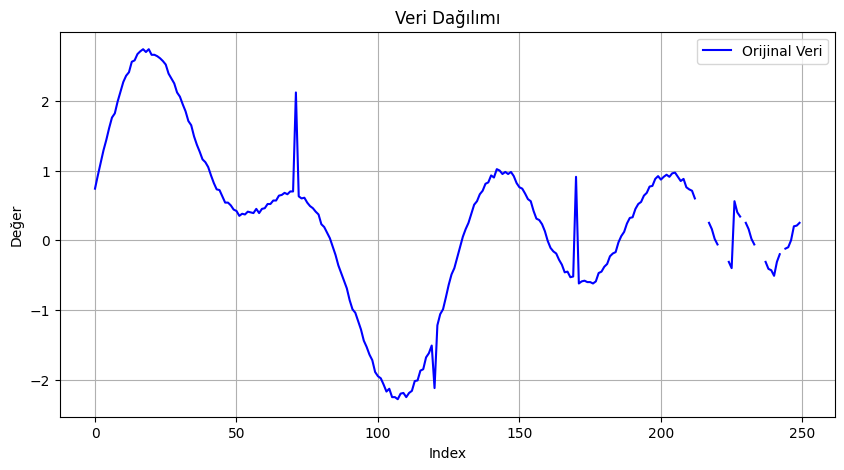

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['DEGERLER'], label='Orijinal Veri', color='blue')
plt.xlabel('Index')
plt.ylabel('Değer')
plt.title('Veri Dağılımı')
plt.legend()
plt.grid(True)
plt.show()

# 4. Preprocessing
- Index sütunun olusturulması ( Index Değerleri 0 yerine 1'den başlamalıdır )  
- NaN/Kayıp veri varsa doldurulması
- Normalization işlemi uygulayarak bunu df_normalization diye bir değişkene atamalısınız, daha sonradan kullanılacak.


In [7]:
df.insert(0, 'index_yeni', range(1, len(df) + 1))
df

,index_yeni,DEGERLER
0,1,0.74
1,2,0.93
2,3,1.11
3,4,1.29
4,5,1.44
...,...,...
245,246,-0.10
246,247,0.00
247,248,0.20
248,249,0.21


In [8]:
df = df.fillna(df.median()) 
df.isnull().sum()

index_yeni    0
DEGERLER      0
dtype: int64

In [9]:
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(df[['DEGERLER']])
df_normalization = pd.DataFrame(normalized_values, columns=['DEGERLER_NORMALIZED'])
df_normalization.insert(0, 'index_yeni', range(1, len(df) + 1))

df_normalization

,index_yeni,DEGERLER_NORMALIZED
0,1,0.601594
1,2,0.639442
2,3,0.675299
3,4,0.711155
4,5,0.741036
...,...,...
245,246,0.434263
246,247,0.454183
247,248,0.494024
248,249,0.496016


# 5. Data Visualization
- Verinin başlangıcı ile df_preprocess ve df_preprocess_normalized versiyonlarının tek bir plot üzerinde çizdirilmesi ve karşılaştırılması

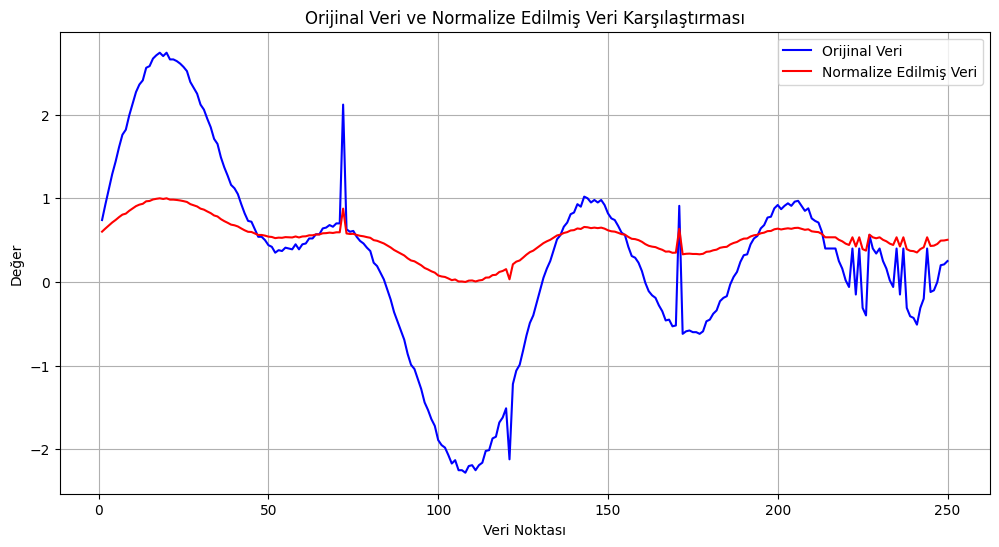

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.index_yeni, df['DEGERLER'], label='Orijinal Veri', color='blue')
plt.plot(df_normalization.index_yeni, df_normalization['DEGERLER_NORMALIZED'], label='Normalize Edilmiş Veri', color='red')
plt.xlabel('Veri Noktası')
plt.ylabel('Değer')
plt.title('Orijinal Veri ve Normalize Edilmiş Veri Karşılaştırması')
plt.legend()
plt.grid(True)
plt.show()

# 6. Anomali Tespiti
- Isolation Forest ile hem preprocess'de normalize edilmiş verinin hem de normalize edilmeden önceki verinin üzerinde anomali tespitinin gerçekleştirilmesi
- Bu iki dataframe'in aynı grafik üzerinde karşılaştırılması ve yorumlanması 

C:\Users\kgel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


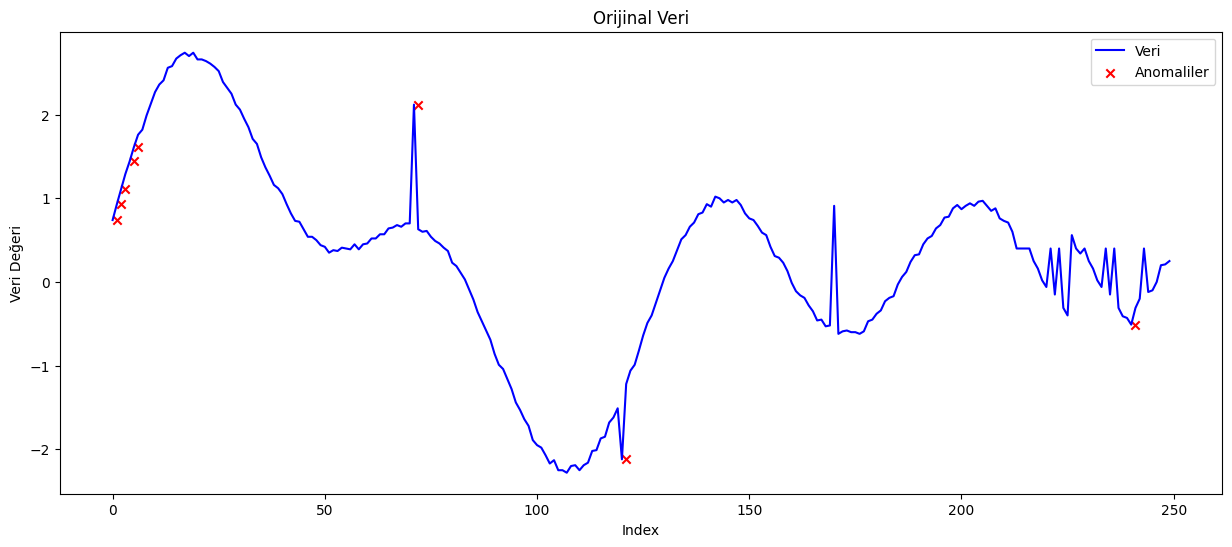

In [11]:
model = IsolationForest(contamination=0.03)
model.fit(df)

prediction = model.predict(df)

anomali_index = np.where(prediction == -1)
anomali = df.iloc[anomali_index]

plt.figure(figsize=(15, 6))
plt.plot(df['DEGERLER'], label='Veri', color='b')
plt.scatter(anomali.index_yeni, anomali['DEGERLER'], c='r', marker='x', label='Anomaliler')
plt.xlabel('Index')
plt.ylabel('Veri Değeri')
plt.title('Orijinal Veri')
plt.legend()
plt.show()

8 nokta anomali olarak tespit edilmiştir.

C:\Users\kgel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


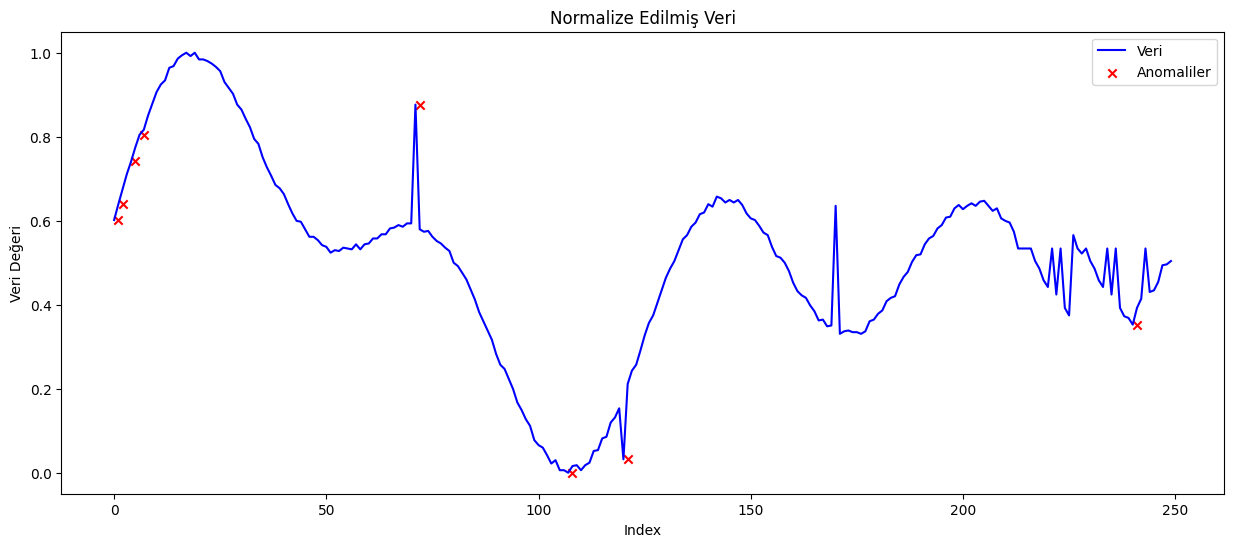

In [12]:
model = IsolationForest(contamination=0.03)
model.fit(df_normalization)

prediction_norm = model.predict(df_normalization)

anomali_index_norm = np.where(prediction_norm == -1)
anomali_norm = df_normalization.iloc[anomali_index_norm]

plt.figure(figsize=(15, 6))
plt.plot(df_normalization['DEGERLER_NORMALIZED'], label='Veri', color='b')
plt.scatter(anomali_norm.index_yeni, anomali_norm['DEGERLER_NORMALIZED'], c='r', marker='x', label='Anomaliler')
plt.xlabel('Index')
plt.ylabel('Veri Değeri')
plt.title('Normalize Edilmiş Veri')
plt.legend()
plt.show()

8 nokta anomali olarak tespit edilmiştir. 

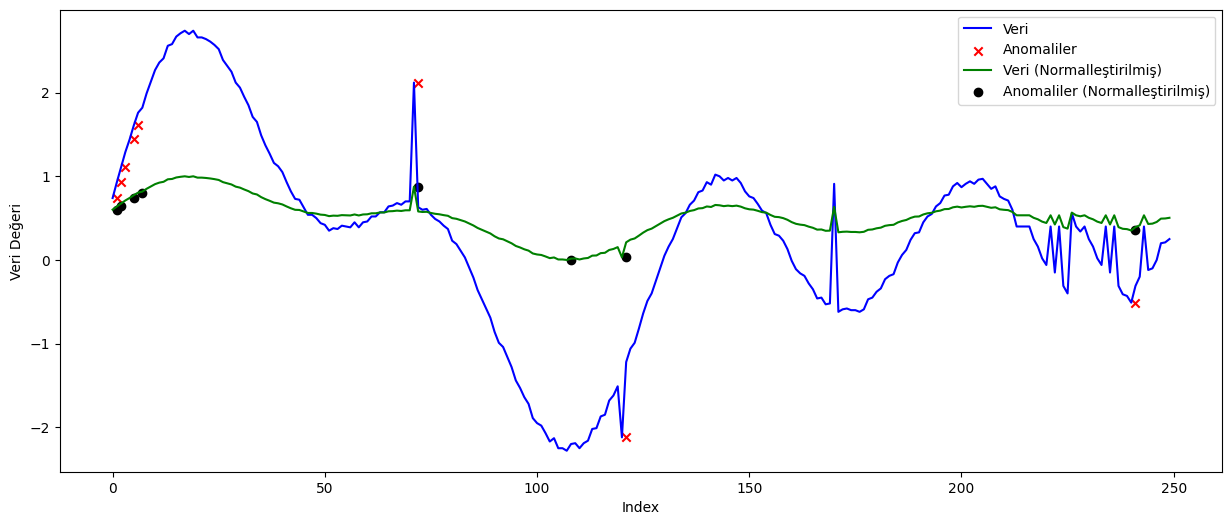

In [13]:
# İki grafiğin aynı grafik üzerinde görüntülenmesi

plt.figure(figsize=(15, 6))

plt.plot(df['DEGERLER'], label='Veri', color='b')
plt.scatter(anomali.index_yeni, anomali['DEGERLER'], c='r', marker='x', label='Anomaliler')

plt.plot(df_normalization['DEGERLER_NORMALIZED'], label='Veri (Normalleştirilmiş)', color='g')
plt.scatter(anomali_norm.index_yeni, anomali_norm['DEGERLER_NORMALIZED'], c='black', marker='o', label='Anomaliler (Normalleştirilmiş)')

plt.xlabel('Index')
plt.ylabel('Veri Değeri')
plt.legend()
plt.show()

# 7. Evaluation

Isolation Forest algoritması normalize edilmeyen veriye uygulandığı zaman 8 noktayı anomali olarak tespit etmiştir. Ancak 171 numaralı indexte bulunan 0.91 değerini anomali olarak işaretlememiştir. Oysa grafikten açıkça anlayacağımız üzere bu nokta anomali noktalardan birisidir. 

Algoritma normalize edilen veriye uygulandığı zaman da yine 8 noktayı anomali olarak işaretledi. Ancak işaretlenen noktalar normalize edilmeyen veride işaretlenen noktalar ile tamamen aynı noktalar değil. Bunun yanı sıra 171 numaralı indexte bulunan anomali noktası normalize edilmiş veride de tespit edilemedi.